Importing clean data and setting up pandas dataset of event 3

In [ ]:
from google.colab import files
uploaded = files.upload()  # file uploaded

Saving event_3.zip to event_3.zip


In [ ]:
import zipfile
import pandas as pd

# Path to your zip file
zip_path = "event_3.zip"

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # List and sort the file names
    csv_files = sorted([f for f in z.namelist() if f.endswith('.csv')])

    # Read them in order and collect as DataFrames
    dfs_event_3 = [pd.read_csv(z.open(f)) for f in csv_files]

# Concatenate all DataFrames
event_3 = pd.concat(dfs_event_3, ignore_index=True)
event_3


,evID,timestamp,enHad,enVis,enNeu,muMom,posX,posZ,amplRec,posY
0,1.012306e+10,1.272871e+12,20.8,642.8,20.8,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,-230.61,161.59,6.82,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,-228.11,174.99,12.94,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,-217.55,174.99,9.11,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,-220.15,188.39,19.94,NaN
...,...,...,...,...,...,...,...,...,...,...
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.73,3.29,87.23
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.73,129.34,110.99
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294.13,120.99,95.23
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294.13,127.54,92.59


In [ ]:
#headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import hdbscan

nearest neighbor, dbscan, hdbscan , pca function construction

In [ ]:
#getting the eps value for dbscan by checking the distance between neighbouring values
def get_nearestneighbor(x,y) :
 k =x
 nbrs = NearestNeighbors(n_neighbors=k).fit(y)
 distances, _ = nbrs.kneighbors()

 distances = np.sort(distances[:, k-1])
 plt.plot(distances)
 plt.ylabel(f'{k}th Nearest Neighbor Distance')
 plt.xlabel('Points sorted by distance')
 plt.show()



In [ ]:
def get_hdbscan_clusters(x,y,z):
 clusterer = hdbscan.HDBSCAN(min_cluster_size=x,min_samples=y, metric='euclidean')
 labels = clusterer.fit_predict(z)
 probs  = clusterer.probabilities_
 outlier = clusterer.outlier_scores_

 print("Clusters found (excluding noise):", np.unique(labels))
 print("Noise fraction:", np.mean(labels == -1))
 plt.figure(figsize=(8, 8))
 for cluster in sorted(set(labels)):
    if cluster == -1:
        color = 'gray'
        label_txt = 'Noise'
    else:
        color = plt.get_cmap('tab10')(cluster % 10)
        label_txt = f'Cluster {cluster}'
    idx = (labels == cluster)
    plt.scatter(z[idx, 0], z[idx, 1],
                s=30,
                color=color,
                alpha=np.clip(probs[idx], 0.3, 1.0),
                label=label_txt)

 plt.xlabel('Feature 0')
 plt.ylabel('Feature 1')
 plt.title('HDBSCAN Clustering (Direct 2D)')
 plt.legend()
 plt.grid(True)
 plt.show()
 return labels



In [ ]:
def get_pca_2d(x,labels):
# PCA for 3D plotting
    X_pca = PCA(n_components=2).fit_transform(x)

  # 2D scatter plot
    plt.figure(figsize=(8, 8))
    for cluster in sorted(set(labels)):
        if cluster == -1:
            color = 'black'
            label = 'Noise'
        else:
            color = plt.get_cmap('tab10')(cluster)
            label = f'Cluster {cluster}'
        idx = labels == cluster
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], color=color, label=label, s=10)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('2D PCA with Clusters')
    plt.legend(title='Cluster')
    plt.show()



Top view

In [ ]:
#taking the filtered and cleaned data
tau_hits = event_3[['posX','posZ', 'amplRec']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(50, 3)

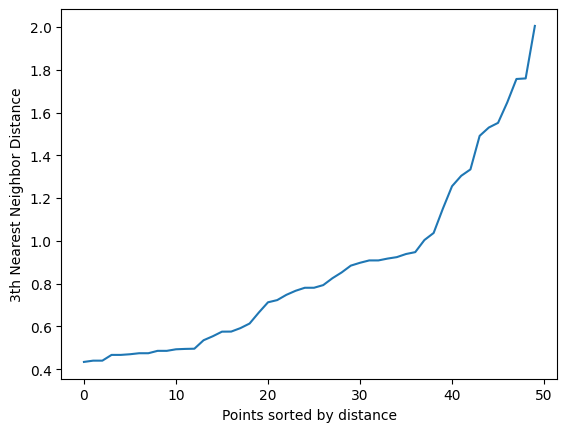

In [ ]:
get_nearestneighbor(3,tau_hits_scaled)#checking the epsilon value for dbscan and checking if the model is appropriate for this dataset

Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.66


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


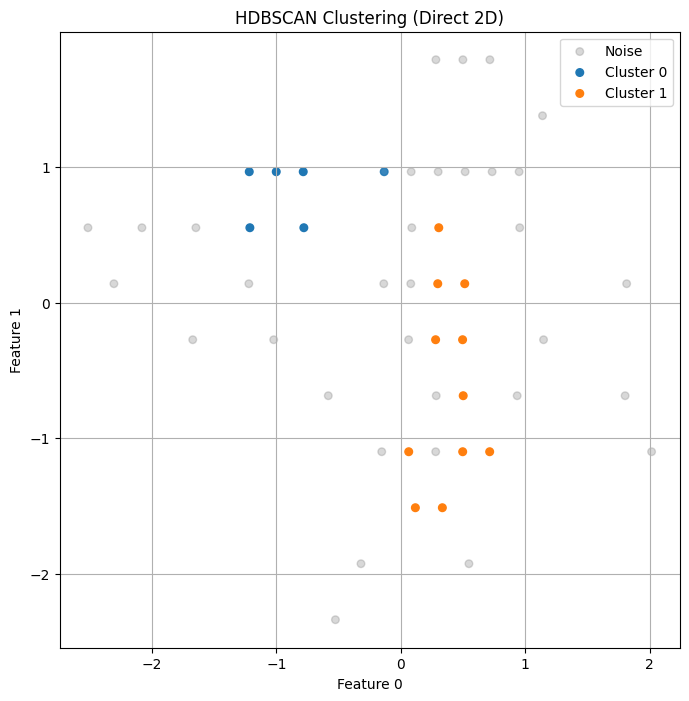

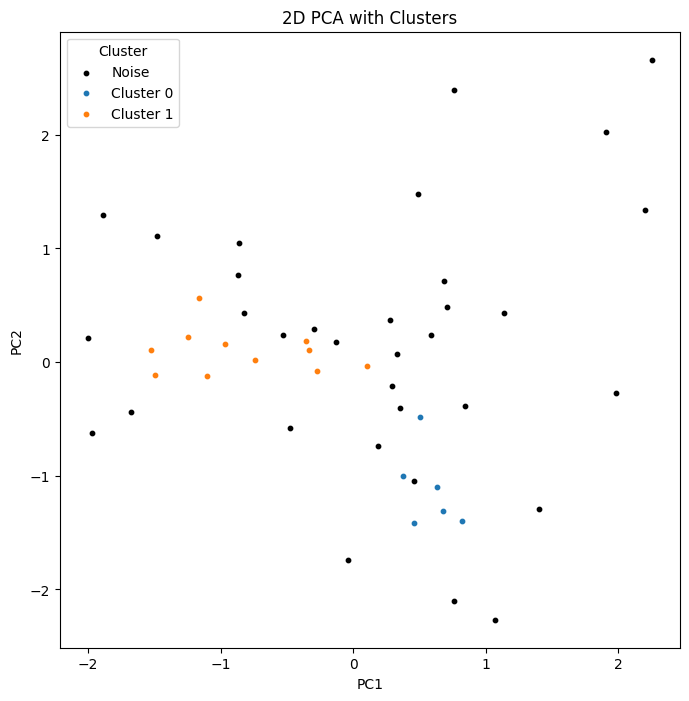

In [ ]:
#hdbscan clustering and pca plot
labels=get_hdbscan_clusters(2,4,tau_hits_scaled)
get_pca_2d(tau_hits_scaled,labels)

Side view

In [ ]:
#getting filtered and cleaned data for side view
tau_hits = event_3[['posY','posZ', 'amplRec']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(59, 3)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.1864406779661017


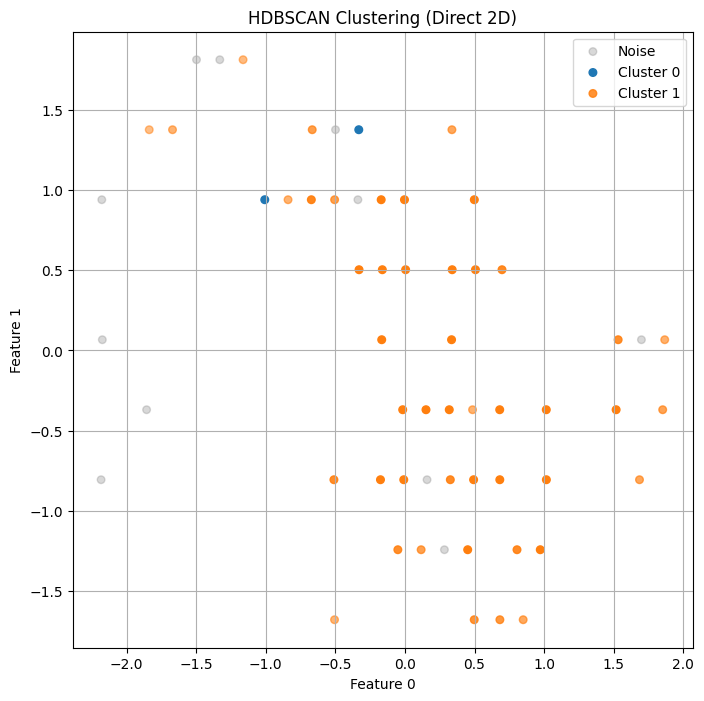

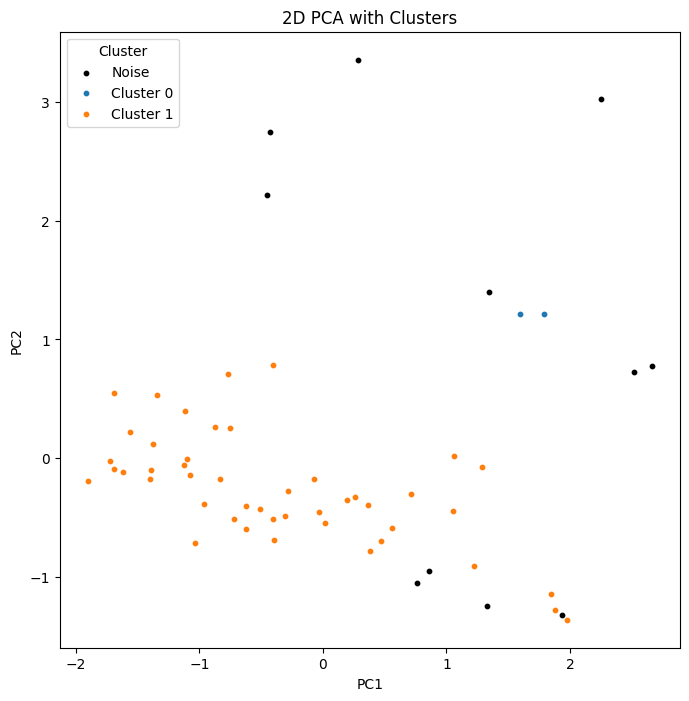

In [ ]:
#getting hdbscan clusters and pca plot
labels=get_hdbscan_clusters(2,4,tau_hits_scaled)
get_pca_2d(tau_hits_scaled,labels)

The dataset is clustered based on the spatial distribution of hits, considering both the top view and the side view, after the neutrino interacts with the target and produces a hadronic shower.
The two clusters may correspond to different types of particles, but the electronic detector data alone is insufficient to unambiguously identify the particles or reconstruct their decay paths.